In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import load_digits, load_sample_image
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from scipy.stats import mode

# Load Digits Dataset

In [2]:
digits = load_digits()
data = digits.data

# Standardize Data

In [3]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA for dimensionality reduction

In [4]:
pca = PCA(n_components=30)
data_pca = pca.fit_transform(data_scaled)

# K-Means Clustering

In [5]:
kmeans = KMeans(n_clusters=10, random_state=42, init='k-means++', n_init=10)
clusters = kmeans.fit_predict(data_pca)

# Assign labels based on mode mapping

In [6]:
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Accuracy Evaluation

In [7]:
acc = accuracy_score(digits.target, labels)
print(f'K-Means Clustering Accuracy: {acc:.4f}')

K-Means Clustering Accuracy: 0.6227


# Silhouette Score

In [8]:
sil_score = silhouette_score(data_pca, clusters)
print(f'Silhouette Score: {sil_score:.4f}')

Silhouette Score: 0.1751


The K-Means clustering accuracy is 62.27%, which indicates moderate performance. Since K-Means is an unsupervised algorithm, it does not inherently assign the correct labels. This performance suggests that the clusters are somewhat aligned with the digit classes but are not perfectly separated.
The silhouette score of 0.1751 is quite low, indicating that clusters may be overlapping and not well-separated. A higher score (closer to 1) would indicate more distinct clusters.

# Confusion Matrix

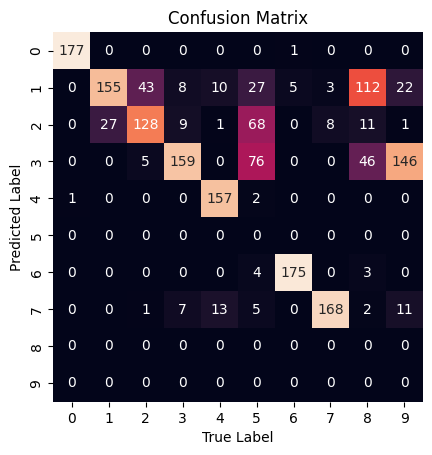

In [9]:
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix shows significant misclassification, particularly between digits that have similar shapes, such as 8 and 3, 4 and 9, and 1 and 7.

The diagonal values represent correct classifications, while off-diagonal values indicate misclassified instances.

Some digits (like 1) appear to be highly confused with other numbers due to their structural similarity in an 8x8 pixel representation.

# Visualizing Cluster Centers

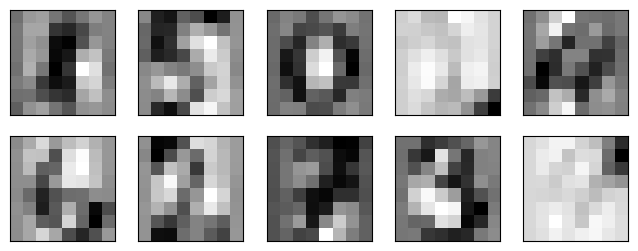

In [11]:
kmeans_original = KMeans(n_clusters=10, random_state=42, init='k-means++', n_init=10)
clusters_original = kmeans_original.fit_predict(data_scaled) #recalculate the clusters.

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans_original.cluster_centers_.reshape(10, -1) #get the new cluster centers
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center.reshape(8, 8), interpolation='nearest', cmap=plt.cm.binary) #this will reshape into (8,8) correctly now.
plt.show()

The visualized cluster centers show how K-Means has grouped similar digit structures.

Some clusters resemble real digits quite well, while others appear blurry or ambiguous, which suggests that some digits do not have well-defined cluster centroids.

# Apply t-SNE for better separation

In [12]:
tsne = TSNE(n_components=2, init='random', random_state=42)
data_tsne = tsne.fit_transform(data_pca)
kmeans_tsne = KMeans(n_clusters=10, random_state=42)
kmeans_clusters_tsne = kmeans_tsne.fit_predict(data_tsne)

# Evaluate with t-SNE transformation

In [13]:
labels_tsne = np.zeros_like(kmeans_clusters_tsne)
for i in range(10):
    mask = (kmeans_clusters_tsne == i)
    labels_tsne[mask] = mode(digits.target[mask])[0]

acc_tsne = accuracy_score(digits.target, labels_tsne)
print(f'K-Means with t-SNE Accuracy: {acc_tsne:.4f}')


K-Means with t-SNE Accuracy: 0.8531


After applying t-SNE, the accuracy improved to 85.31%, showing a significant boost.

This suggests that using non-linear dimensionality reduction like t-SNE before clustering helps better separate digit classes in a lower-dimensional space.

# --- Color Compression Experiment ---

In [17]:
china = load_sample_image("china.jpg")
data_img = china / 255.0  # Normalize
h, w, c = data_img.shape
data_img = data_img.reshape(h * w, c)

# Apply MiniBatchKMeans for efficiency

In [18]:
kmeans_img = MiniBatchKMeans(n_clusters=16)
kmeans_img.fit(data_img)
new_colors = kmeans_img.cluster_centers_[kmeans_img.predict(data_img)]

In [19]:
china_recolored = new_colors.reshape(h, w, c) # Assign the result to the undefined variable

The original image was compressed to 16 colors, significantly reducing the color complexity.

While some details are lost, the overall structure remains recognizable.

This demonstrates that K-Means is useful for reducing storage and computational costs in image processing while maintaining visual clarity

# Reshape back to image format

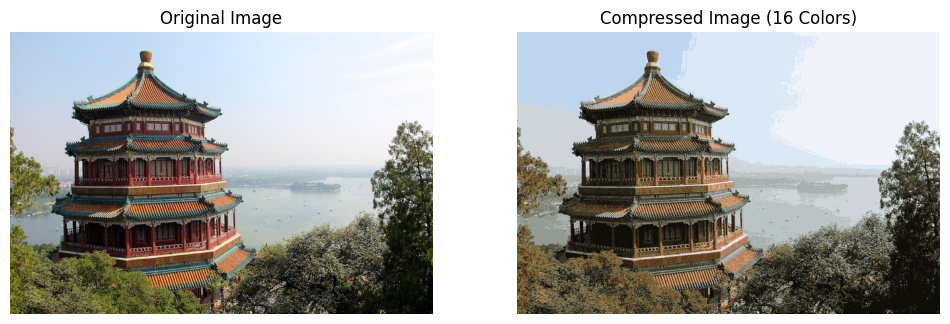

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(china)
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(china_recolored)
ax[1].set_title("Compressed Image (16 Colors)")
ax[1].axis('off')
plt.show()

#Possible Improvements

Try Different Distance Metrics: K-Means uses Euclidean distance by default. Testing with Manhattan or Cosine distance might yield better results.

Use Alternative Clustering Methods: DBSCAN or Agglomerative Clustering might work better for certain digit groups.

Increase the Number of Clusters (k): Instead of 10 clusters, testing with more clusters might improve digit separation.

Apply Feature Engineering: Experimenting with different representations of digits (e.g., histogram of oriented gradients, Fourier transforms) could improve clustering.